<a href="https://colab.research.google.com/github/CrushDemo01/CVCourceHomework/blob/master/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.常见的滤波器有哪几种? 分别说明它们的功能。


## 1.常见的滤波器有哪几种? 分别说明它们的功能。

在图像处理中，常见的滤波器有以下几种：

1. 均值滤波器（Mean Filter）：均值滤波器是一种低通滤波器，它用于平滑图像并减少噪声。它的功能是通过计算像素周围邻域的平均灰度值，将每个像素的值替换为其邻域的平均值。均值滤波器适用于去除高频噪声，但可能会导致图像细节的模糊。

1. 中值滤波器（Median Filter）：中值滤波器也是一种常用的平滑滤波器，它用于去除图像中的椒盐噪声或脉冲噪声。该滤波器的功能是将每个像素的值替换为其邻域中值。中值滤波器对于保留图像细节非常有效，尤其适用于处理有离群点的图像。

1. 高斯滤波器（Gaussian Filter）：高斯滤波器是一种常用的线性平滑滤波器，它通过应用高斯函数对图像进行平滑处理。高斯滤波器的功能是降低图像中高频成分的强度，从而实现图像平滑和噪声抑制。它可以根据设置的标准差来控制平滑程度。

1. 锐化滤波器（Sharpening Filter）：锐化滤波器用于增强图像的边缘和细节，使图像更加清晰和鲜明。常见的锐化滤波器包括拉普拉斯滤波器和增强型锐化滤波器。锐化滤波器通过增加图像中高频成分的强度来提高图像的锐度。

1. Sobel滤波器：Sobel滤波器是一种常用的边缘检测滤波器，用于检测图像中的边缘。它基于求取图像的梯度值，并将边缘位置标记为较大的梯度值。Sobel滤波器可以分别计算图像在水平和垂直方向上的梯度，从而检测出水平和垂直边缘。

这些滤波器在图像处理中被广泛应用，用于平滑图像、去除噪声、增强边缘和细节等。根据具体的图像处理任务，可以选择适当的滤波器来实现所需的效果。

## 2.尝试2~3种边缘滤波算子逃行边缘检测。(编写代码)

In [ ]:
import numpy as np

def mean_filter(image, kernel_size):
    height, width = image.shape
    filtered_image = np.zeros_like(image, dtype=np.float32)
    padding = kernel_size // 2

    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            window = image[i-padding:i+padding+1, j-padding:j+padding+1]
            average = np.mean(window)
            filtered_image[i, j] = average

    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image


def median_filter(image, kernel_size):
    height, width = image.shape
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    padding = kernel_size // 2

    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            window = image[i-padding:i+padding+1, j-padding:j+padding+1]
            median = np.median(window)
            filtered_image[i, j] = median

    return filtered_image


import numpy as np
from scipy.ndimage import convolve

def gaussian_filter(image, kernel_size, sigma):
    kernel = gaussian_kernel(kernel_size, sigma)
    filtered_image = convolve(image, kernel, mode='constant')
    return filtered_image

def gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(kernel_size//2))**2+(y-(kernel_size//2))**2)/(2*sigma**2)), (kernel_size, kernel_size))
    kernel = kernel / np.sum(kernel)  # 归一化
    return kernel


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


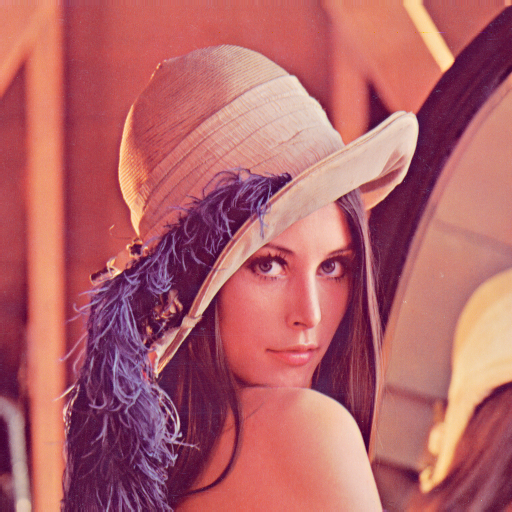

(512, 512, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow

# 读取图像
image = cv2.imread('/content/drive/MyDrive/pic/lena_std.tif', 0)
cv2_imshow(image)
image.shape

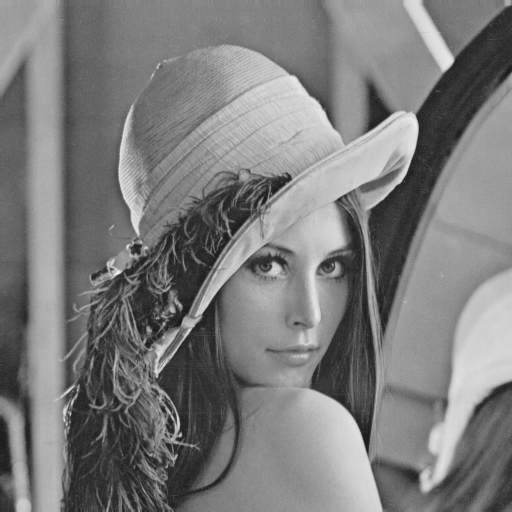

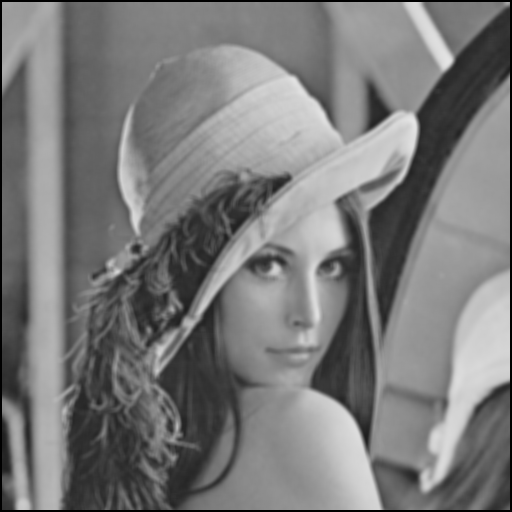

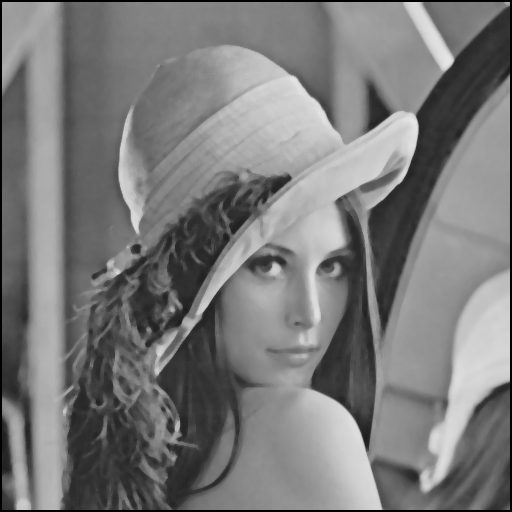

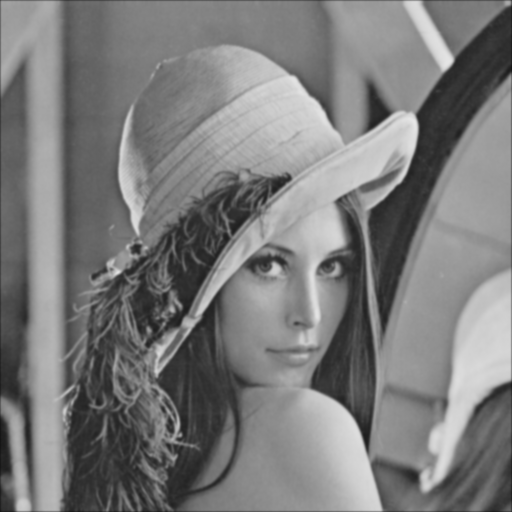

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


# 读取图像
image = cv2.imread('/content/drive/MyDrive/pic/lena_std.tif', 0)

# 均值滤波
mean_filtered = mean_filter(image, kernel_size=5)

# 中值滤波
median_filtered = median_filter(image, kernel_size=5)

# 高斯滤波
gaussian_filtered = gaussian_filter(image, kernel_size=5, sigma=1)

# 显示原始图像和滤波结果
cv2_imshow(image)
cv2_imshow(mean_filtered)
cv2_imshow(median_filtered)
cv2_imshow(gaussian_filtered)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 3.构建拉普拉斯金字塔? (编写代码)

In [ ]:
import cv2
import numpy as np


def get_gaussian_pyramid(image, levels):
    pyramid = [image]

    for i in range(levels-1):
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid


def laplacian_pyramid(image, levels):
    pyramid = []
    gaussian_pyramid = get_gaussian_pyramid(image, levels)

    for i in range(levels-1):
        expanded = expand(gaussian_pyramid[i+1])
        difference = cv2.subtract(gaussian_pyramid[i], expanded)
        pyramid.append(difference)

    pyramid.append(gaussian_pyramid[levels-1])

    return pyramid


def expand(image):
    rows, cols = image.shape[:2]
    return cv2.pyrUp(image, dstsize=(cols*2, rows*2))


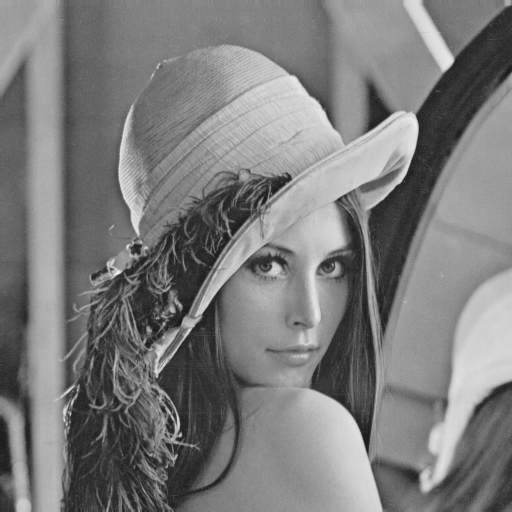

Laplacian Level 0


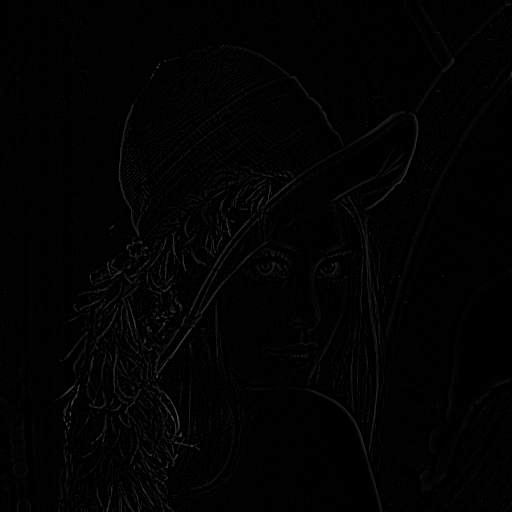

Laplacian Level 1


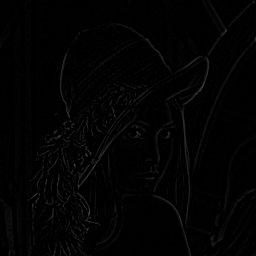

Laplacian Level 2


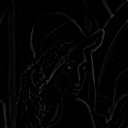

Laplacian Level 3


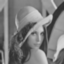

In [ ]:

# 读取图像
# image = cv2.imread('image.jpg', 0)

# 构建拉普拉斯金字塔
levels = 4
laplacian = laplacian_pyramid(image, levels)

# 显示原始图像和拉普拉斯金字塔
cv2_imshow(image)
# cv2.imshow('Original Image', image)

for i in range(levels):
    print(f'Laplacian Level {i}')
    cv2_imshow(laplacian[i])




# 在这个示例中，首先定义了三个函数：laplacian_pyramid用于构建拉普拉斯金字塔，gaussian_pyramid用于构建高斯金字塔，expand用于对图像进行扩展操作。
# 然后，通过cv2.imread函数读取一张灰度图像（假设图像名为'image.jpg'）。
# 接下来，调用laplacian_pyramid函数构建拉普拉斯金字塔，并指定金字塔的级别数（在示例中为4级）。
# 最后，通过cv2.imshow函数显示原始图像和每个级别的拉普拉斯图像，使用循环遍历金字塔中的每个级别。
# 请注意，这是一个基本的示例，你可以根据需要调整金字塔的级别数和图像的路径等。还可以使用其他图像处理库或方法加载和显示图像。